# Introduction
This is a dataset of software non-function requirements for different types of software products

In [1]:
import warnings
import os
import pandas as pd

# Set up the directory to save the dataset
dataset_dir = './software_requirements_dataset'
os.makedirs(dataset_dir, exist_ok=True)

# Download the dataset
!kaggle datasets download -d iamvaibhav100/software-requirements-dataset -p {dataset_dir} --unzip

# Load the CSV file into a DataFrame (assuming the file name is `requirements.csv` or similar)
file_path = os.path.join(dataset_dir, 'software_requirements_extended.csv')  # Replace 'requirements.csv' with the actual file name
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

Dataset URL: https://www.kaggle.com/datasets/iamvaibhav100/software-requirements-dataset
License(s): CC0-1.0

  Type                                        Requirement
0   PE  The system shall refresh the display every 60 ...
1   LF  The application shall match the color of the s...
2   US   If projected  the data must be readable.  On ...
3    A   The product shall be available during normal ...
4   US   If projected  the data must be understandable...



  0%|          | 0.00/33.0k [00:00<?, ?B/s]
100%|██████████| 33.0k/33.0k [00:00<00:00, 1.74MB/s]


# Dataset Preview
Display the first few rows of the dataset using df.head().

In [2]:
# Dataset Preview
## Display the first few rows of the dataset
print("Dataset preview:")
display(df.head())

Dataset preview:


,Type,Requirement
0,PE,The system shall refresh the display every 60 ...
1,LF,The application shall match the color of the s...
2,US,If projected the data must be readable. On ...
3,A,The product shall be available during normal ...
4,US,If projected the data must be understandable...


# Missing Values Check
Check for any missing values in the dataset using df.isnull().sum().

In [3]:
# Missing Values Check
## Check for any missing values in the dataset
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Type           0
Requirement    0
dtype: int64


# Dataset Information
Display basic information about the dataset using df.info().

In [4]:
# Dataset Information
## Display basic information about the dataset
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         977 non-null    object
 1   Requirement  977 non-null    object
dtypes: object(2)
memory usage: 15.4+ KB


# Unique Requirement Types
Check unique types of requirements in the 'Type' column using df['Type'].unique().

In [5]:
# Unique Requirement Types
## Check unique types of requirements in the 'Type' column
print("\nUnique types of requirements:")
print(df['Type'].unique())


Unique types of requirements:
['PE' 'LF' 'US' 'A' 'SE' 'F' 'L' 'O' 'PO' 'SC' 'FT' 'MN' 'FR' 'NFR']


# Requirement Length Statistics
Calculate and display basic statistics about the 'Requirement' column length using df['Requirement'].apply(len) and df['Requirement_length'].describe().

In [6]:
# Requirement Length Statistics
## Calculate and display basic statistics about the 'Requirement' column length
df['Requirement_length'] = df['Requirement'].apply(len)
print("\nRequirement length statistics:")
print(df['Requirement_length'].describe())


Requirement length statistics:
count     977.000000
mean      126.743091
std        92.693852
min        13.000000
25%        75.000000
50%       103.000000
75%       146.000000
max      1118.000000
Name: Requirement_length, dtype: float64


# Visualization of Requirement Types
Visualize the distribution of types of requirements using seaborn's countplot.

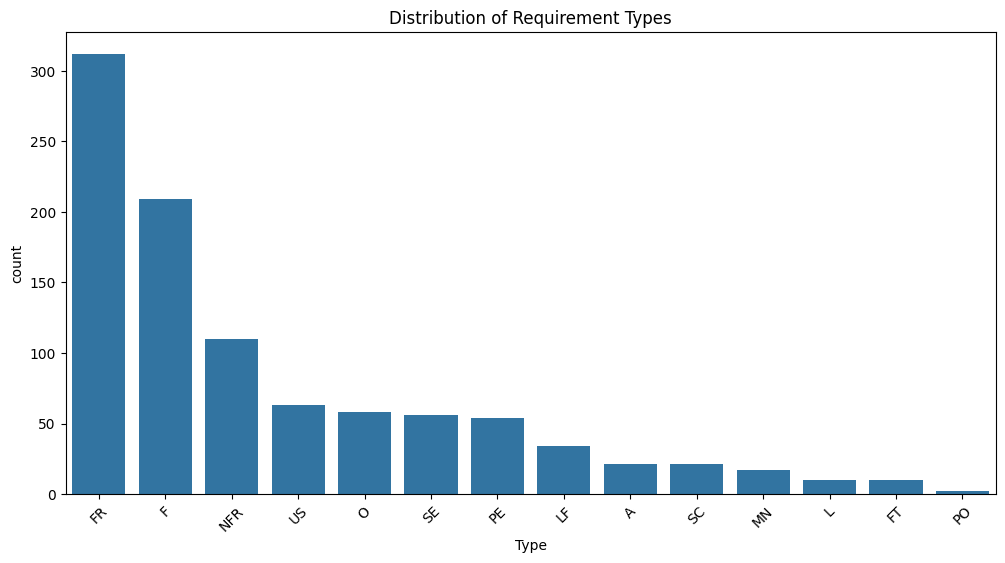

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization of Requirement Types
## Visualize the distribution of types of requirements using seaborn's countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)
plt.title('Distribution of Requirement Types')
plt.xticks(rotation=45)
plt.show()

# Preprocess the data

In [8]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Preprocess function
def preprocess_text(text):
    # Tokenize and remove stopwords using spaCy
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    # Lemmatize using NLTK
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing to the 'Requirement' column
df['Processed_Requirement'] = df['Requirement'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gdgue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gdgue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gdgue\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Convert the text into numerical format

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(df['Processed_Requirement'])

# Convert to PyTorch tensors
import torch
X_tensor = torch.tensor(X_vectorized.toarray(), dtype=torch.float32)
y_tensor = torch.tensor(df['Type'].astype('category').cat.codes.values, dtype=torch.long)

# Create the pytorch model to classify the data

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class EnhancedTextClassificationModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EnhancedTextClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define model parameters
input_dim = X_tensor.shape[1]
hidden_dim = 128  # Choose an appropriate hidden dimension size
output_dim = len(df['Type'].unique())

# Initialize the enhanced model
model = EnhancedTextClassificationModel(input_dim, hidden_dim, output_dim)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


c:\Users\gdgue\Anaconda3\envs\personalProjects\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Train the model

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/300], Loss: 2.6733
Epoch [2/300], Loss: 2.6497
Epoch [3/300], Loss: 2.6263
Epoch [4/300], Loss: 2.6044
Epoch [5/300], Loss: 2.5803
Epoch [6/300], Loss: 2.5584
Epoch [7/300], Loss: 2.5341
Epoch [8/300], Loss: 2.5076
Epoch [9/300], Loss: 2.4817
Epoch [10/300], Loss: 2.4552
Epoch [11/300], Loss: 2.4229
Epoch [12/300], Loss: 2.3909
Epoch [13/300], Loss: 2.3554
Epoch [14/300], Loss: 2.3199
Epoch [15/300], Loss: 2.2801
Epoch [16/300], Loss: 2.2450
Epoch [17/300], Loss: 2.2035
Epoch [18/300], Loss: 2.1591
Epoch [19/300], Loss: 2.1199
Epoch [20/300], Loss: 2.0769
Epoch [21/300], Loss: 2.0337
Epoch [22/300], Loss: 1.9879
Epoch [23/300], Loss: 1.9459
Epoch [24/300], Loss: 1.8947
Epoch [25/300], Loss: 1.8501
Epoch [26/300], Loss: 1.8069
Epoch [27/300], Loss: 1.7633
Epoch [28/300], Loss: 1.7163
Epoch [29/300], Loss: 1.6629
Epoch [30/300], Loss: 1.6194
Epoch [31/300], Loss: 1.5724
Epoch [32/300], Loss: 1.5286
Epoch [33/300], Loss: 1.4828
Epoch [34/300], Loss: 1.4465
Epoch [35/300], Loss: 1

# Evaluate the model

Accuracy: 0.7449


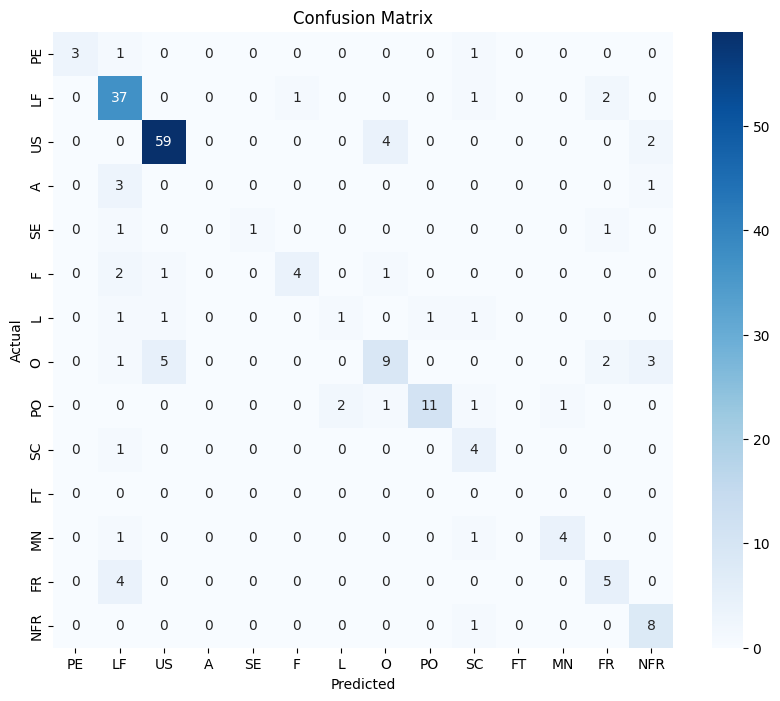

Accuracy: 0.7449


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Accuracy: {accuracy:.4f}')

# Convert the predicted tensotr to a numpy array of its classes text
predicted = [df['Type'].unique()[i] for i in predicted.numpy()]
y_test_label = [df['Type'].unique()[i] for i in y_test.numpy()]
# Calculate confusion matrix
cm = confusion_matrix(y_test_label, predicted, labels=df['Type'].unique())

# Calculate accuracy
accuracy = accuracy_score(y_test_label, predicted)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy:.4f}')

# Using text embedding into a vectordb and similarity search instead

In [15]:
import chromadb
from sentence_transformers import SentenceTransformer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Initialize stop words
stop_words = set(stopwords.words('english'))

# Initialize the SentenceTransformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Clean and preprocess the requirements
df['Requirement_clean'] = df['Requirement'].apply(lambda x: ' '.join(
    [word.lower() for word in word_tokenize(x) if word.lower() not in stop_words and word.isalpha()]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Requirement_clean'], df['Type'], test_size=0.2, random_state=42)

# Generate embeddings for each requirement in the training set
embeddings = model.encode(X_train.tolist())

# Initialize ChromaDB client
client = chromadb.Client()

collection = client.create_collection("requirements_collection")

# Add embeddings and metadata to ChromaDB
for idx, (embedding, requirement, req_type) in enumerate(zip(embeddings, X_train, y_train)):
    collection.add(
        embeddings=[embedding],
        metadatas=[{'Type': req_type, 'Requirement': requirement}],
        ids=[str(idx)]
    )

print("Embeddings from the training data added to ChromaDB collection.")

Embeddings from the training data added to ChromaDB collection.


In [16]:
def query_requirement_type(text):
    """Queries ChromaDB for the closest requirement type based on input text."""
    # Preprocess and embed the input text
    cleaned_text = ' '.join([word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalpha()])
    query_embedding = model.encode([cleaned_text])[0]
    
    # Query ChromaDB for similar requirements
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=1
    )
    
    # Extract the most similar requirement type and its confidence score
    best_match = results['metadatas'][0][0]
    predicted_class = best_match['Type']
    confidence_score = results['distances'][0][0]  # Lower distance indicates higher similarity
    
    return predicted_class, 1 - confidence_score  # Adjust to interpret as confidence

In [17]:
y_pred = []
for text in X_test:
    predicted_type, _ = query_requirement_type(text)
    y_pred.append(predicted_type)

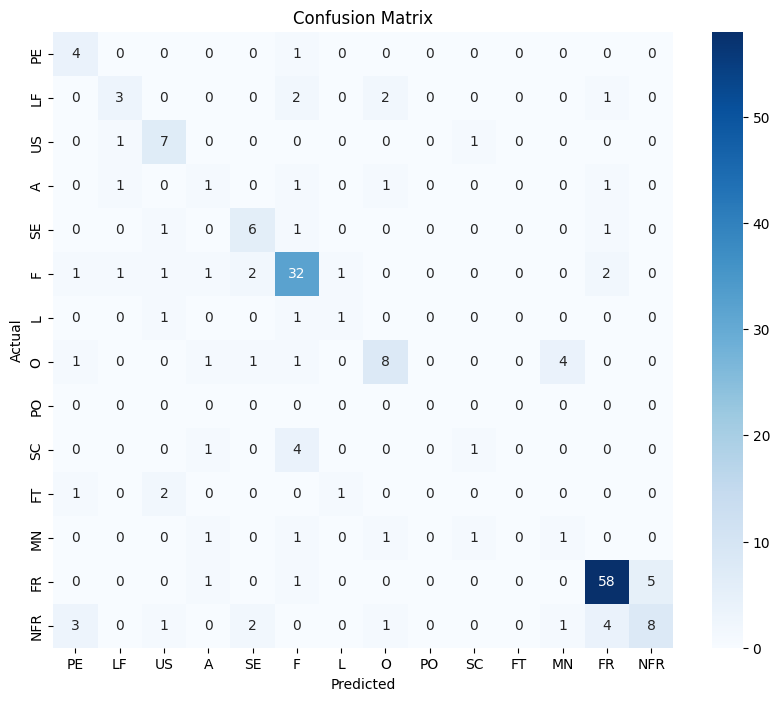

Accuracy: 0.6633


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=df['Type'].unique())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy: {accuracy:.4f}')